# Regression MLP Porject : House Proce Prediction

In [31]:
## import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

**Load and Process Data**

In [3]:
## load the data
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
## check for missing values in the data
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                                     'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

In [8]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [18]:
# Identify the features and target variable
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

(436, 13)
(109, 13)
(436,)
(109,)


**Build the Regression MLP Model**

In [24]:
# Initialize the model
model = Sequential()

# Add input and hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add the output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 24761495191552.0000 - mae: 4699134.5000 - val_loss: 23870218174464.0000 - val_mae: 4547883.5000
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24526534475776.0000 - mae: 4666528.5000 - val_loss: 23792650813440.0000 - val_mae: 4541385.0000
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24071972585472.0000 - mae: 4638763.5000 - val_loss: 23711581208576.0000 - val_mae: 4534571.0000
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23527392542720.0000 - mae: 4558746.5000 - val_loss: 23626050961408.0000 - val_mae: 4527372.5000
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24253695000576.0000 - mae: 4645747.0000 - val_loss: 23532614451200.0000 - val_mae: 4519510.5000
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23967884640256.0000 - mae: 4584285.5000 - val_loss: 23437386973184.0000 - val_mae: 4511460.0000
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24333940424704.00

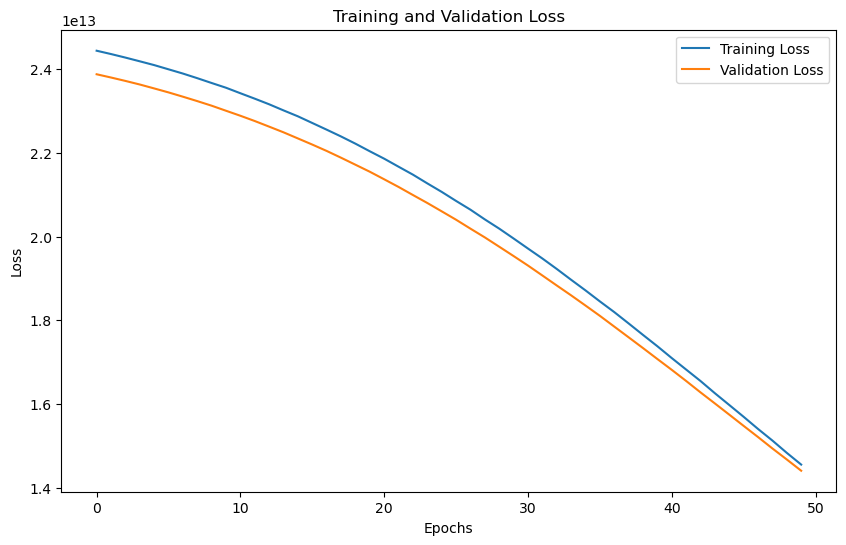

In [29]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Visualize the training process
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [30]:
# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Absolute Error: {mae:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16188141731840.0000 - mae: 3737566.5000 
Test Mean Absolute Error: 3870443.50


In [34]:
# Make predictions
predictions = model.predict(X_test_scaled)

# Display the first few predictions
print(predictions[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[ 182824.31]
 [2568800.  ]
 [ 334679.28]
 [ 798074.56]
 [ 224531.19]]


**Fine-Tune the Model to Improve Performance**

To improve the model's performance, you can fine-tune the following aspects:

+ Increase the number of epochs: Train the model for more epochs if the loss is still decreasing.
+ Adjust the learning rate: Try different learning rates with the Adam optimizer.
+ Add more hidden layers or neurons: Increase the complexity of the model if underfitting is suspected.
+ Use Dropout or Batch Normalization: To prevent overfitting or help the model generalize better.

C:\Users\Faiz Salam\AnacondaNavigator\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 26318045446144.0000 - mae: 4836754.0000 - val_loss: 24781594296320.0000 - val_mae: 4623896.5000
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25409903132672.0000 - mae: 4723402.0000 - val_loss: 24781579616256.0000 - val_mae: 4623895.5000
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24667135934464.0000 - mae: 4676793.5000 - val_loss: 24781556547584.0000 - val_mae: 4623893.0000
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25100069896192.0000 - mae: 4729568.5000 - val_loss: 24781512507392.0000 - val_mae: 4623888.5000
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26162975735808.0000 - mae: 4821676.5000 - val_loss: 24781424427008.0000 - val_mae: 4623880.5000
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25102313848832.0000 - mae: 4734101.5000 - val_loss: 24781273432064.0000 - val_mae: 4623866.5000
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2538235494

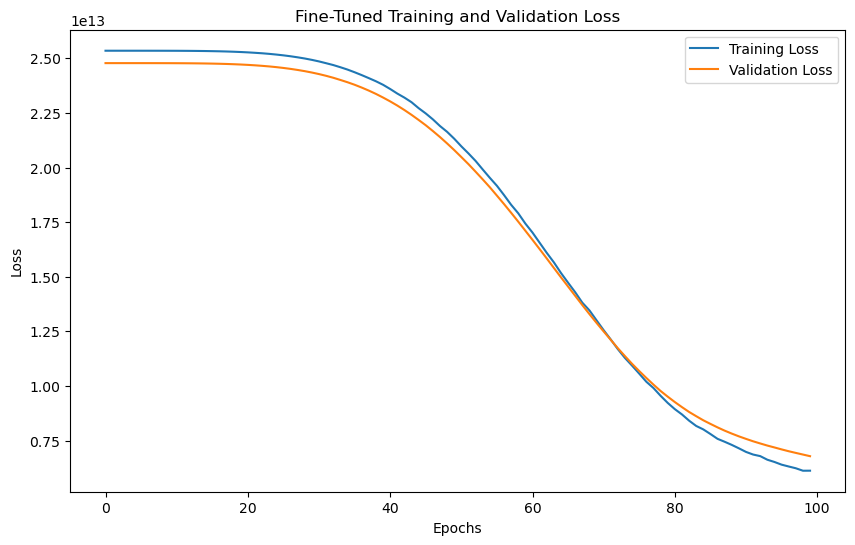

In [32]:
# Rebuild the model with fine-tuning
model_tuned = Sequential()
model_tuned.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_tuned.add(Dropout(0.2))  # Add dropout layer to prevent overfitting
model_tuned.add(Dense(64, activation='relu'))
model_tuned.add(Dense(32, activation='relu'))
model_tuned.add(Dense(1))

# Compile the fine-tuned model
model_tuned.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Retrain the fine-tuned model
history_finetuned = model_tuned.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Visualize the fine-tuned training process
plt.figure(figsize=(10, 6))
plt.plot(history_finetuned.history['loss'], label='Training Loss')
plt.plot(history_finetuned.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Fine-Tuned Training and Validation Loss')
plt.legend()
plt.show()

In [33]:
# Evaluate the fine-tuned model
loss_finetuned, mae_finetuned = model_tuned.evaluate(X_test_scaled, y_test)
print(f'Fine-Tuned Test Mean Absolute Error: {mae_finetuned:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6931824508928.0000 - mae: 2329255.2500 
Fine-Tuned Test Mean Absolute Error: 2339452.50


**10 layered MLP for the Problem**

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 25225487974400.0000 - mae: 4724341.0000 - val_loss: 24781590102016.0000 - val_mae: 4623896.5000
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25833104211968.0000 - mae: 4770258.0000 - val_loss: 24781533478912.0000 - val_mae: 4623891.0000
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24765658038272.0000 - mae: 4696316.0000 - val_loss: 24781286014976.0000 - val_mae: 4623866.0000
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25163076730880.0000 - mae: 4729307.0000 - val_loss: 24780268896256.0000 - val_mae: 4623765.5000
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25718786359296.0000 - mae: 4753061.0000 - val_loss: 24776584200192.0000 - val_mae: 4623406.0000
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25553398661120.0000 - mae: 4722719.5000 - val_loss: 24765045669888.0000 - val_mae: 4622301.0000
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2341453221

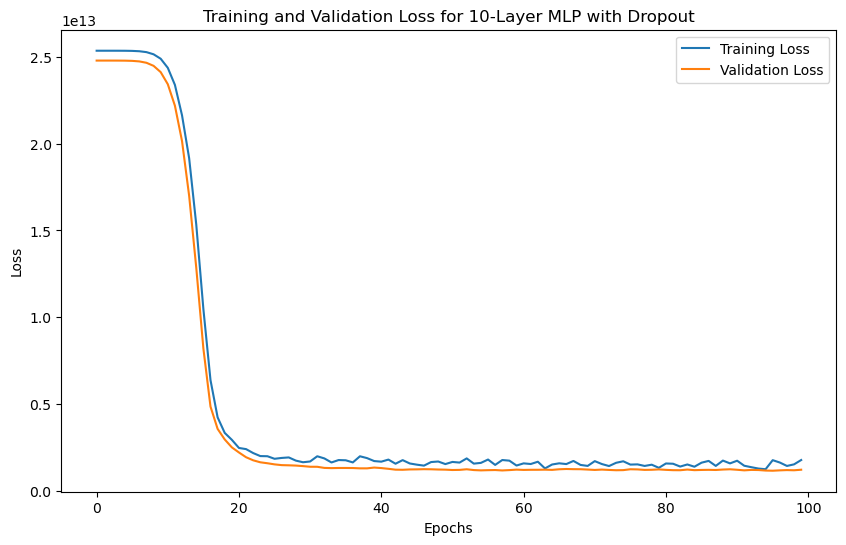

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16188141731840.0000 - mae: 3737566.5000 
10-Layer Model Test Mean Absolute Error: 3870443.50


In [35]:
# Initialize the MLP model with 10 layers
model_3 = Sequential()

# Add input layer and first hidden layer
model_3.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_3.add(Dropout(0.2))  # Dropout after the first hidden layer

# Add more hidden layers with alternating Dropout layers
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.2))  # Dropout after the second hidden layer

model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.2))  # Dropout after the third hidden layer

model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.2))  # Dropout after the fourth hidden layer

model_3.add(Dense(32, activation='relu'))
model_3.add(Dropout(0.2))  # Dropout after the fifth hidden layer

# Add the output layer
model_3.add(Dense(1))

# Compile the model
model_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model_3.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Visualize the training process
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for 10-Layer MLP with Dropout')
plt.legend()
plt.show()

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'10-Layer Model Test Mean Absolute Error: {mae:.2f}')